# XY - Modell

In [8]:
# Standard imports for computational physics
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'scatter'])
plt.rcParams["figure.figsize"] = (12, 8)

Most recent run: 1


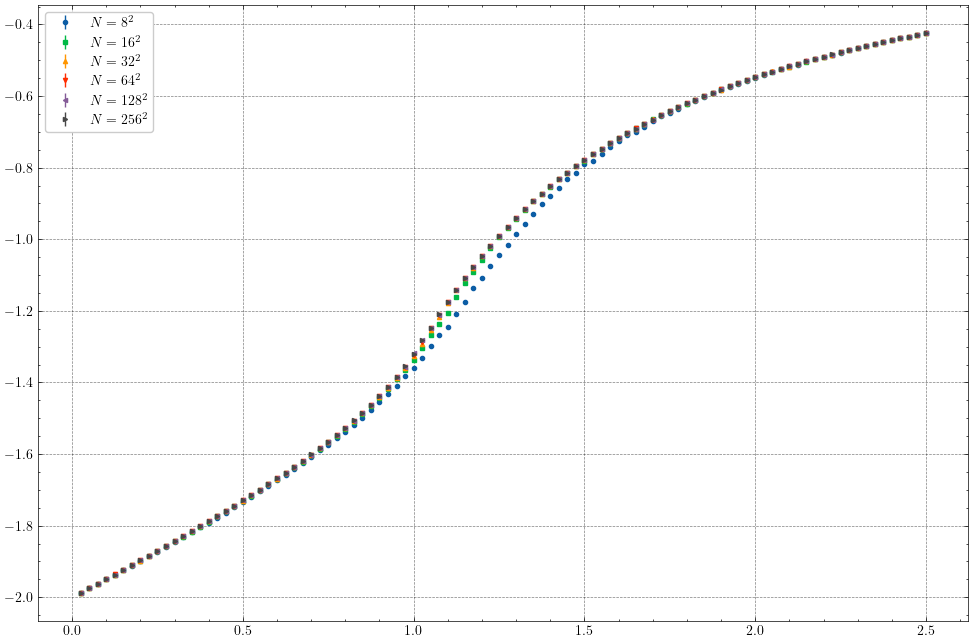

In [12]:
con = sqlite3.connect('output.sqlite')
current_run = pd.read_sql_query('SELECT id FROM runs ORDER BY created_at DESC', con).at[0, 'id']
print(f'Most recent run: {current_run}')

fig, ax = plt.subplots()
for size in pd.read_sql_query(f'SELECT size FROM configurations WHERE run_id = \'{current_run}\' GROUP BY size', con)['size']:
    data = pd.read_sql_query(f'SELECT * FROM configurations WHERE run_id = \'{current_run}\' AND size = \'{size}\' ORDER BY temperature', con)
    ax.errorbar(data['temperature'], data['energy'], yerr=data['energy_std'], label=f'$N = {size}^2$')

ax.legend()
fig.savefig('Energy.pdf', bbox_inches='tight')